In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
df = pd.read_excel('시도별 전출입 인구수.xlsx')
df.head()

전출지별   전입지별      1970      1971      1972      1973      1974      1975  \
0  전출지별   전입지별  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1    전국     전국   4046536   4210164   3687938   4860418   5297969   9011440   
2   NaN  서울특별시   1742813   1671705   1349333   1831858   2050392   3396662   
3   NaN  부산광역시    448577    389797    362202    482061    680984    805979   
4   NaN  대구광역시         -         -         -         -         -         -   

       1976      1977  ...      2008      2009      2010      2011      2012  \
0  이동자수 (명)  이동자수 (명)  ...  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)   
1   6773250   7397623  ...   8808256   8487275   8226594   8127195   7506691   
2   2756510   2893403  ...   2025358   1873188   1733015   1721748   1555281   
3    724664    785117  ...    514502    519310    519334    508043    461042   
4         -         -  ...    409938    398626    370817    370563    348642   

       2013      2014      2015      2016      2017  
0  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  이동자수 (명)  
1   7411784   7629098   7755286   7378430   7154226  
2   1520090   1573594   1589431   1515602   1472937  
3    478451    485710    507031    459015    439073  
4    351873    350213    351424    328228    321182  

[5 rows x 50 columns]

In [3]:
# 데이터 전처리
df = df.fillna(method='ffill') # 각 컬럼의 데이터 중 NaN을 이전 행의 값으로 대체

mask = (df['전출지별']=='서울특별시') & (df['전입지별']!='서울특별시')
df_seoul = df[mask] # 전출지가 서울이고 전입지가 서울이 아닌 데이터만 추출
df_seoul = df_seoul.drop(['전출지별'], axis=1) # 전출지별 컬럼 삭제
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True) # 전입지별 컬럼명을 전입지로 변경
df_seoul.set_index('전입지', inplace=True) # 전입지 컬럼을 인덱스로 지정
df_seoul.head()

1970     1971     1972     1973     1974     1975     1976     1977  \
전입지                                                                             
전국     1448985  1419016  1210559  1647268  1819660  2937093  2495620  2678007   
부산광역시    11568    11130    11768    16307    22220    27515    23732    27213   
대구광역시        -        -        -        -        -        -        -        -   
인천광역시        -        -        -        -        -        -        -        -   
광주광역시        -        -        -        -        -        -        -        -   

          1978     1979  ...     2008     2009     2010     2011     2012  \
전입지                      ...                                                
전국     3028911  2441242  ...  2083352  1925452  1848038  1834806  1658928   
부산광역시    29856    28542  ...    17353    17738    17418    18816    16135   
대구광역시        -        -  ...     9720    10464    10277    10397    10135   
인천광역시        -        -  ...    50493    45392    46082    51641    49640   
광주광역시        -        -  ...    10846    11725    11095    10587    10154   

          2013     2014     2015     2016     2017  
전입지                                                 
전국     1620640  1661425  1726687  1655859  1571423  
부산광역시    16153    17320    17009    15062    14484  
대구광역시    10631    10062    10191     9623     8891  
인천광역시    47424    43212    44915    43745    40485  
광주광역시     9129     9759     9216     8354     7932  

[5 rows x 48 columns]

선 그래프

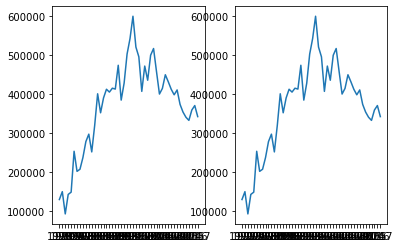

In [4]:
sr_one = df_seoul.loc['경기도']
sr_one.head()
plt.subplot(121)
plt.plot(sr_one) # 데이터프레임을 인수로

plt.subplot(122)
plt.plot(sr_one.index, sr_one.values) # x축과 y축을 지정

plt.show()

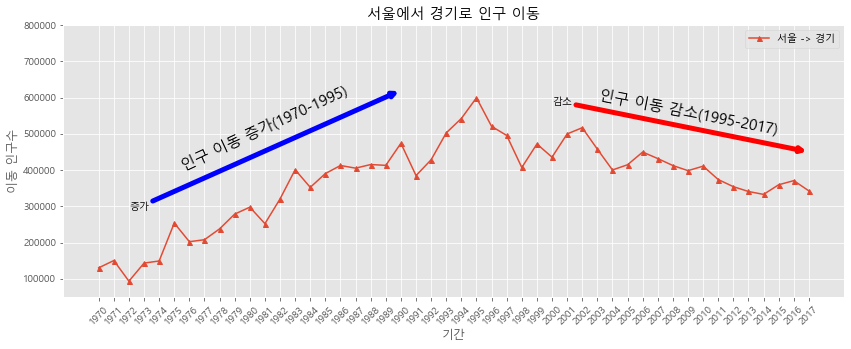

In [5]:
# 한글깨짐방지
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot') # 그래프 스타일 설정
plt.figure(figsize=(14,5)) # 그래프 사이즈 설정
plt.plot(sr_one, marker='^', markersize=5) # 그래프 그리기, 마커설정
plt.title('서울에서 경기로 인구 이동') # 제목 설정
plt.xlabel('기간') # x축 이름 설정
plt.ylabel('이동 인구수') # y축 이름 설정
plt.xticks(rotation=45) # x축 눈금 라벨 기울기 각도 설정
plt.legend(labels=['서울 -> 경기'], loc=0) # 범례 표시, loc=0이면 최적의 위치에 표시

plt.ylim(50000,800000) # y축 범위 설정

## 주석 표시
# 화살표
plt.annotate('증가', # 표시 텍스트
            xy=(20,620000), # 화살표 끝 위치(x축은 인덱스번호, y축은 데이터값, 자료형이 숫자이냐 아니냐에따라 달라짐)
            xytext=(2,290000), # 화살표 시작 및 텍스트 위치
            xycoords='data', # 사용할 좌표계
            arrowprops={'arrowstyle': '->', 'color': 'blue', 'lw': 5} # 화살표 속성(스타일,색상, 선두께)
            )

plt.annotate('감소', xy=(47,450000), xytext=(30,580000), xycoords='data', arrowprops={'arrowstyle': '->', 'color': 'red', 'lw': 5})

# 텍스트
plt.annotate('인구 이동 증가(1970-1995)', # 표시할 텍스트
            xy=(11,400000), # 텍스트 위치
            rotation=25, # 반시계방향으로 회전
            va='baseline', # 세로방향 정렬(center, top, bottom, baseline)
            ha='center', # 가로방향 정렬(center, left, right)
            fontsize=15)

plt.annotate('인구 이동 감소(1995-2017)',xy=(39,500000),rotation=-11,va='baseline',ha='center',fontsize=15)


plt.show()

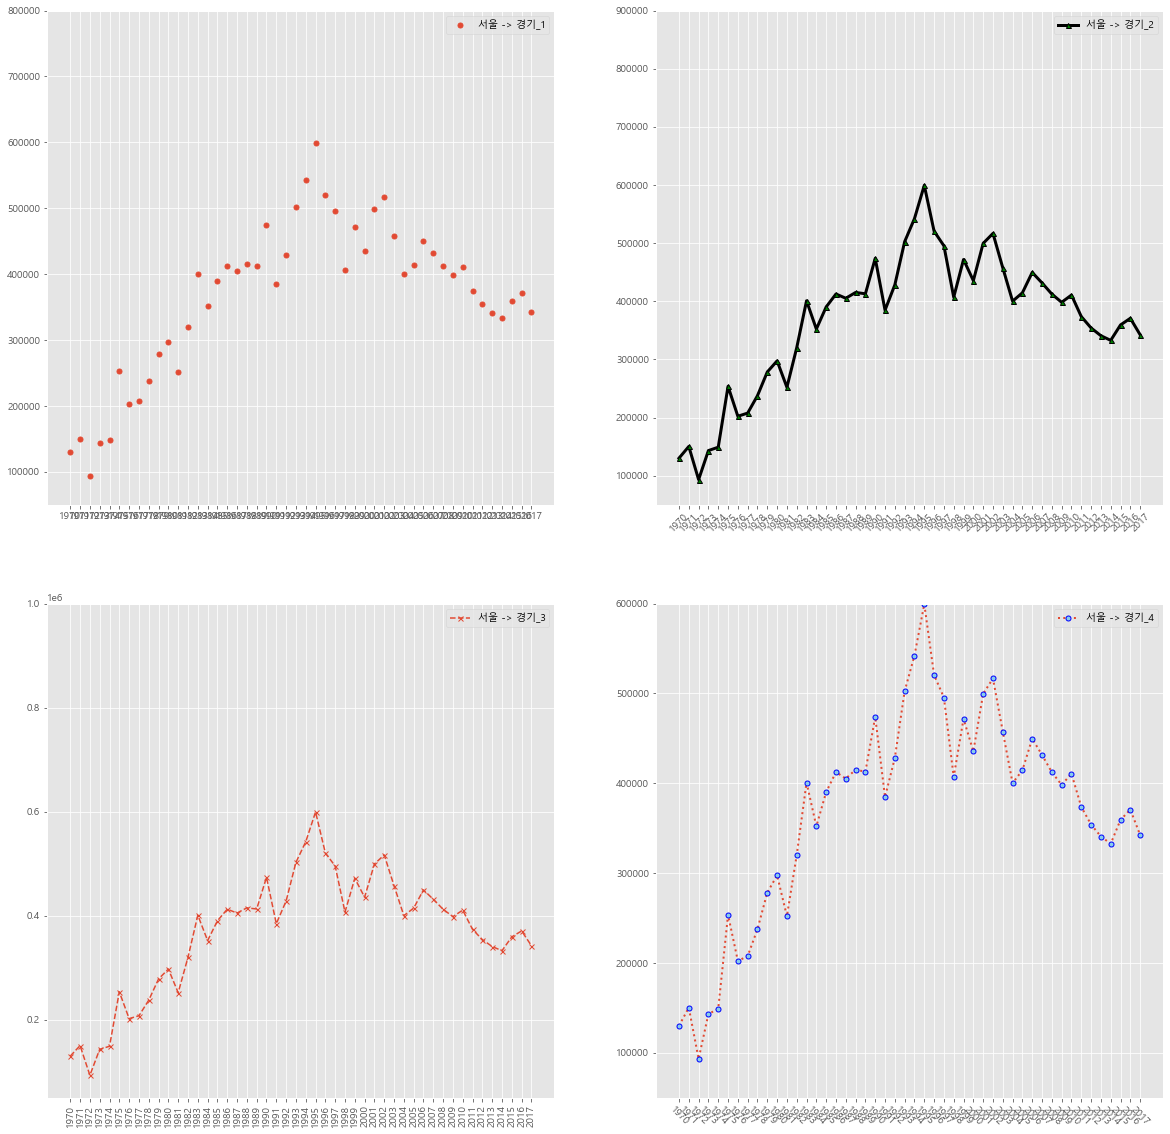

In [6]:
## 그래프 여러개 그리기(화면 분할)
fig = plt.figure(figsize=(20,20)) # figure 사이즈 설정
ax1 = fig.add_subplot(2,2,1) # axe 객체 생성
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 그래프 그리기
# marker=마커모양, markersize=마커사이즈, markerfacecolor=마커내부생상, markeredgecolor=마커가장자리색상
# lw=선두께, ls=선스타일, label=라벨 지정
ax1.plot(sr_one, 'o', markersize=5, label='서울 -> 경기_1')
ax2.plot(sr_one, marker='^', markersize=5, markerfacecolor='green', color='k', lw=3, label='서울 -> 경기_2')
ax3.plot(sr_one, marker='x', markersize=5, ls='--', label='서울 -> 경기_3')
ax4.plot(sr_one, marker='o', markersize=5, markeredgecolor='blue', markerfacecolor='skyblue', ls=':', lw=2, label='서울 -> 경기_4')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()

ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,900000)
ax3.set_ylim(50000,1000000)
ax4.set_ylim(50000,600000)

ax1.set_xticks(sr_one.index)
ax1.set_xticklabels(sr_one.index, rotation= 0)
ax2.set_xticks(sr_one.index)
ax2.set_xticklabels(sr_one.index, rotation= 45)
ax3.set_xticks(sr_one.index)
ax3.set_xticklabels(sr_one.index, rotation= 90)
ax4.set_xticks(sr_one.index)
ax4.set_xticklabels(sr_one.index, rotation= -45)

plt.show()

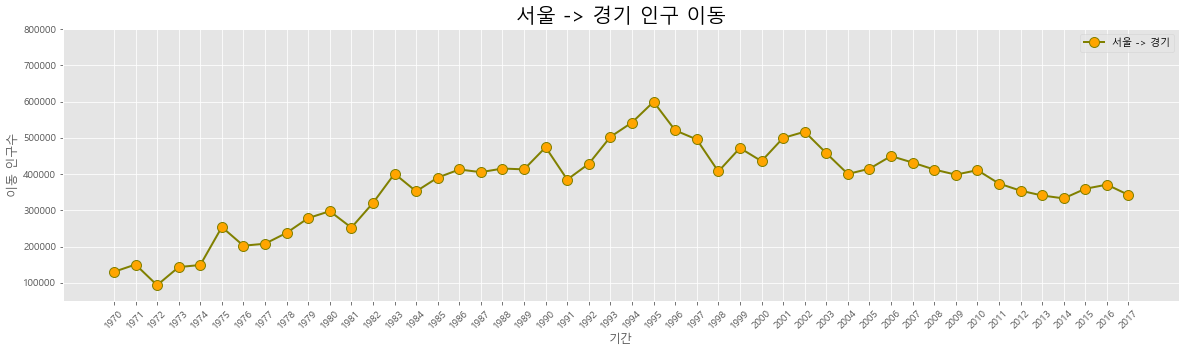

In [7]:
# 한글 깨짐 방지
font_path = 'c:/Windows/Fonts/malgun.ttf'   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot') # 스타일 지정 

fig = plt.figure(figsize=(20, 5)) # 사이즈 설정
ax = fig.add_subplot(1, 1, 1) # axe 객체 생성

ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10, color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc=0)
ax.set_ylim(50000, 800000)

ax.set_title('서울 -> 경기 인구 이동', size=20) # 차트 제목 추가

ax.set_xlabel('기간', size = 12) # x축이름 추가
ax.set_ylabel('이동 인구수', size = 12) # y축이름 추가

ax.set_xticks(sr_one.index)
ax.set_xticklabels(sr_one.index, rotation=45)

ax.tick_params(axis="x", labelsize=10) # 축 눈금 라벨 크기 설정
ax.tick_params(axis="y", labelsize=10)

plt.show()  

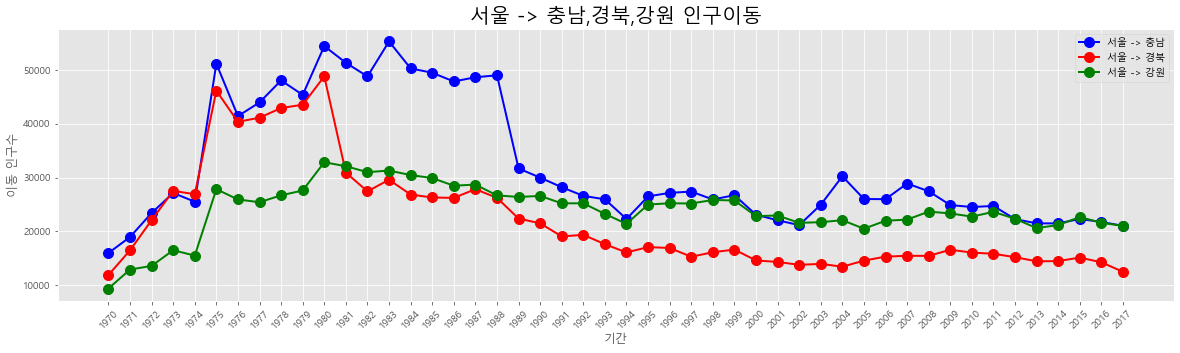

In [8]:
col_years = list(map(str, range(1970,2018))) # 인덱스 대신 x축으로 사용할 데이터 생성
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'], col_years] # 충남,경북,강원 행에서 1970~2017년도의 데이터만 뽑아서 새 데이터프레임 생성

plt.style.use('ggplot') 
fig = plt.figure(figsize=(20, 5)) 
ax = fig.add_subplot(1, 1, 1)

ax.plot(col_years, df_3.loc['충청남도'], marker='o', markerfacecolor='blue', markersize=10, color='blue', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도'], marker='o', markerfacecolor='red', markersize=10, color='red', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도'], marker='o', markerfacecolor='green', markersize=10, color='green', linewidth=2, label='서울 -> 강원')
ax.legend(loc=0)

ax.set_title('서울 -> 충남,경북,강원 인구이동',size=20)

ax.set_xlabel('기간', size = 12) 
ax.set_ylabel('이동 인구수', size = 12) 

ax.set_xticks(col_years)
ax.set_xticklabels(col_years, rotation=45)

ax.tick_params(axis="x", labelsize=10) #
ax.tick_params(axis="y", labelsize=10)

plt.show() 

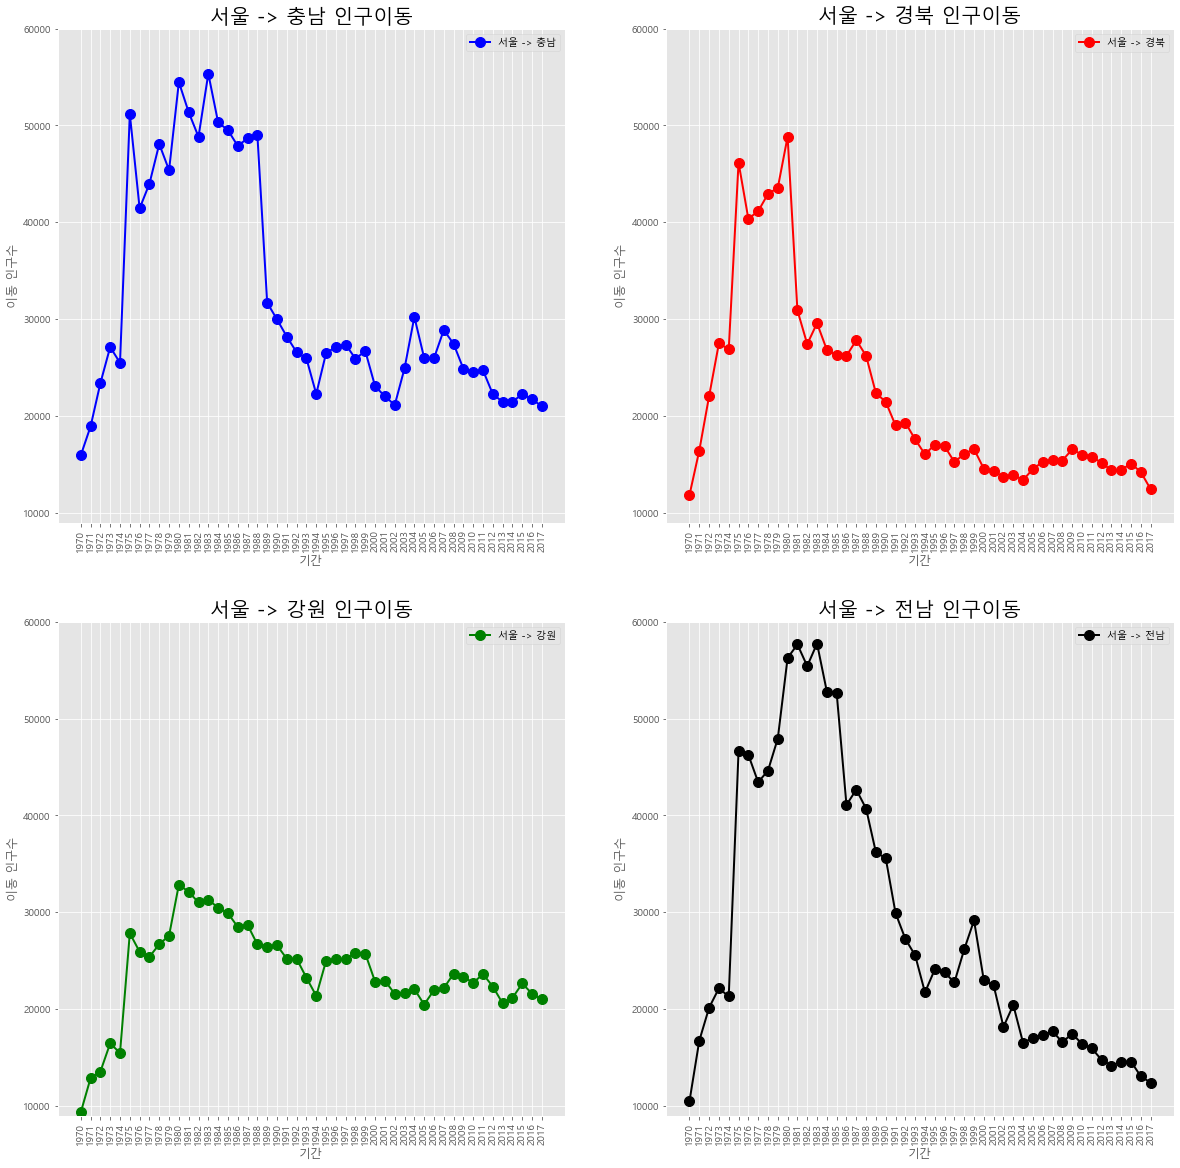

In [9]:
col_years = list(map(str, range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.plot(col_years, df_3.loc['충청남도'], marker='o', markerfacecolor='blue', markersize=10, color='blue', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_3.loc['경상북도'], marker='o', markerfacecolor='red', markersize=10, color='red', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_3.loc['강원도'], marker='o', markerfacecolor='green', markersize=10, color='green', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_3.loc['전라남도'], marker='o', markerfacecolor='k', markersize=10, color='k', linewidth=2, label='서울 -> 전남')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


ax1.set_title('서울 -> 충남 인구이동',size=20)
ax2.set_title('서울 -> 경북 인구이동',size=20)
ax3.set_title('서울 -> 강원 인구이동',size=20)
ax4.set_title('서울 -> 전남 인구이동',size=20)

ax1.set_ylim(9000,60000)
ax2.set_ylim(9000,60000)
ax3.set_ylim(9000,60000)
ax4.set_ylim(9000,60000)

ax1.set_xlabel('기간', size = 12) 
ax1.set_ylabel('이동 인구수', size = 12)
ax2.set_xlabel('기간', size = 12) 
ax2.set_ylabel('이동 인구수', size = 12)
ax3.set_xlabel('기간', size = 12) 
ax3.set_ylabel('이동 인구수', size = 12)
ax4.set_xlabel('기간', size = 12) 
ax4.set_ylabel('이동 인구수', size = 12)

ax1.set_xticks(col_years)
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticks(col_years)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticks(col_years)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticks(col_years)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()

면적 그래프

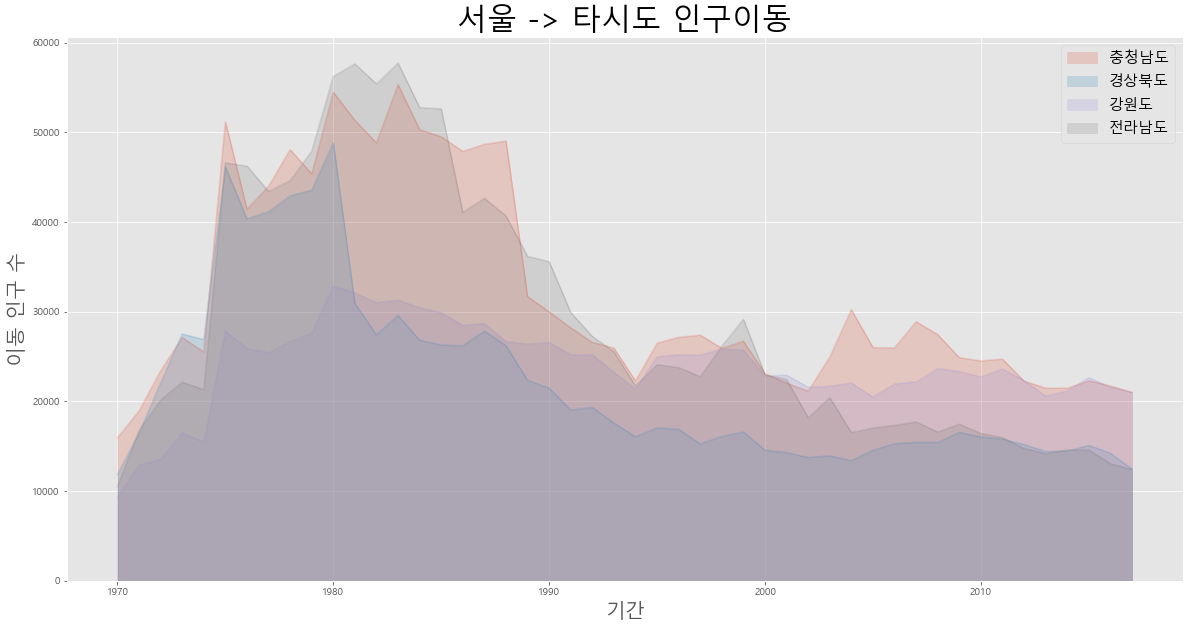

In [10]:
df_4 = df_3.T

plt.style.use('ggplot')

df_4.index=df_4.index.map(int)

df_4.plot(kind='area', # 그래프 종류
          stacked=False, # 면적 겹치지 않음으로 설정
         alpha=0.2, # 각 면적 투명도
         figsize=(20,10)
         )

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc=0, fontsize=15)

plt.show()

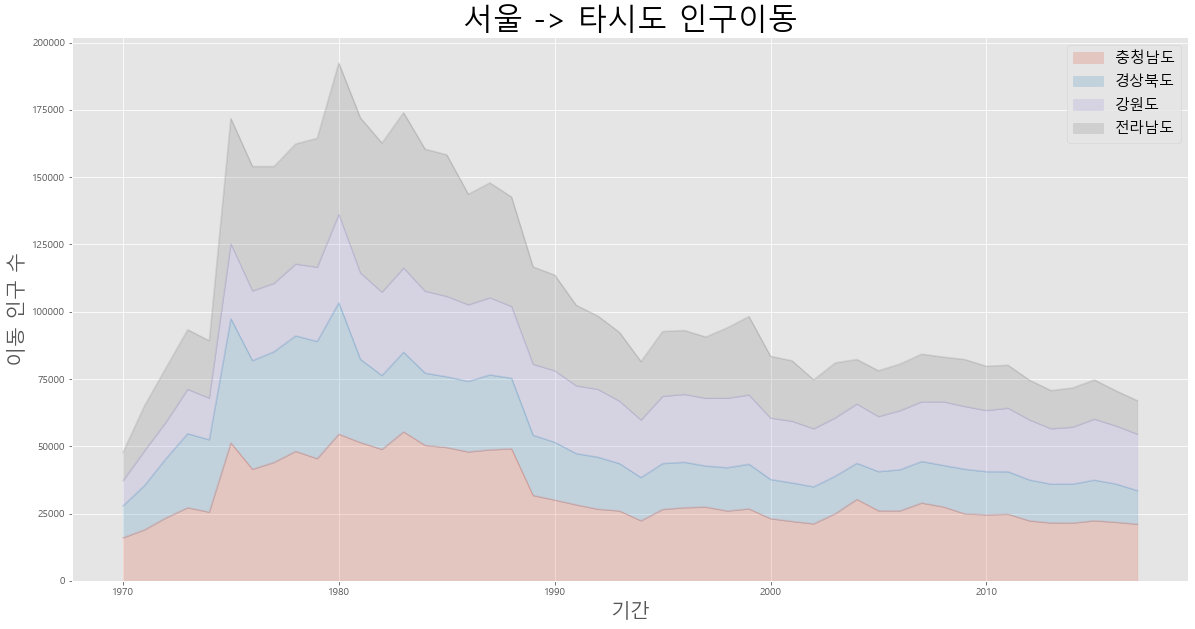

In [11]:
plt.style.use('ggplot')

df_4.index=df_4.index.map(int)

df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10)) # 면적 누적

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc=0, fontsize=15)

plt.show()

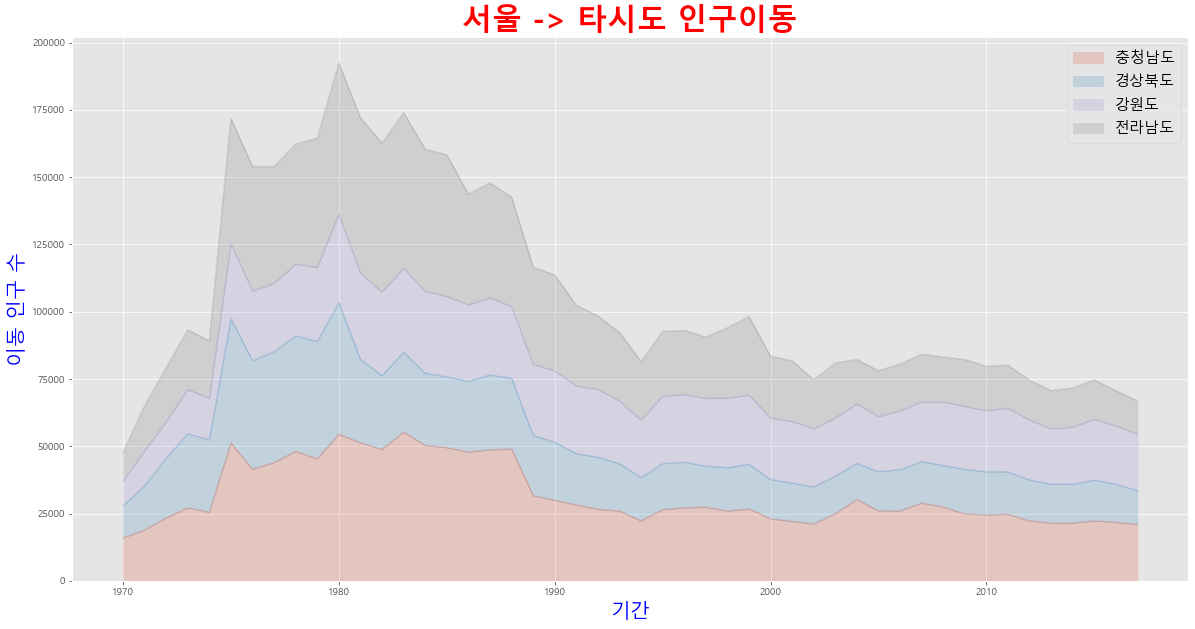

In [12]:
# plot() 메소드로 생성된 그래프는 axe객체이므로 새로운 변수에 저장 후 axe 객체 메소드를 적용해 그래프를 설정할 수도 있다


ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize=(20,10)) # 면적 누적

ax.set_title('서울 -> 타시도 인구이동', size=30, color='r', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='b')
ax.set_xlabel('기간', size=20, color='b')
ax.legend(loc=0, fontsize=15)

plt.show()

막대 그래프

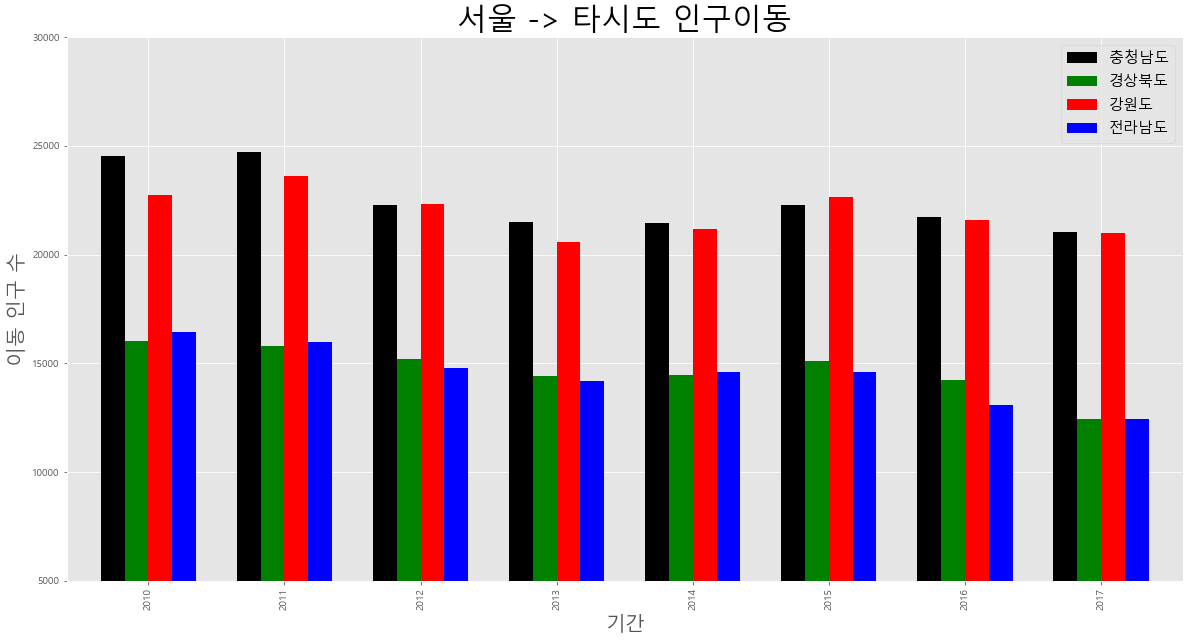

In [13]:
# 수직 막대 그래프
col_years = list(map(str, range(2010,2018)))
df_5 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years].T

plt.style.use('ggplot')

df_5.index=df_5.index.map(int)

df_5.plot(kind='bar', # 그래프 종류
          figsize=(20,10), # 사이즈
         width=0.7, # 바 너비
         color=['k','g','r','b']) # 바 색상 

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.ylim(5000,30000)
plt.legend(loc=0, fontsize=15)

plt.show()

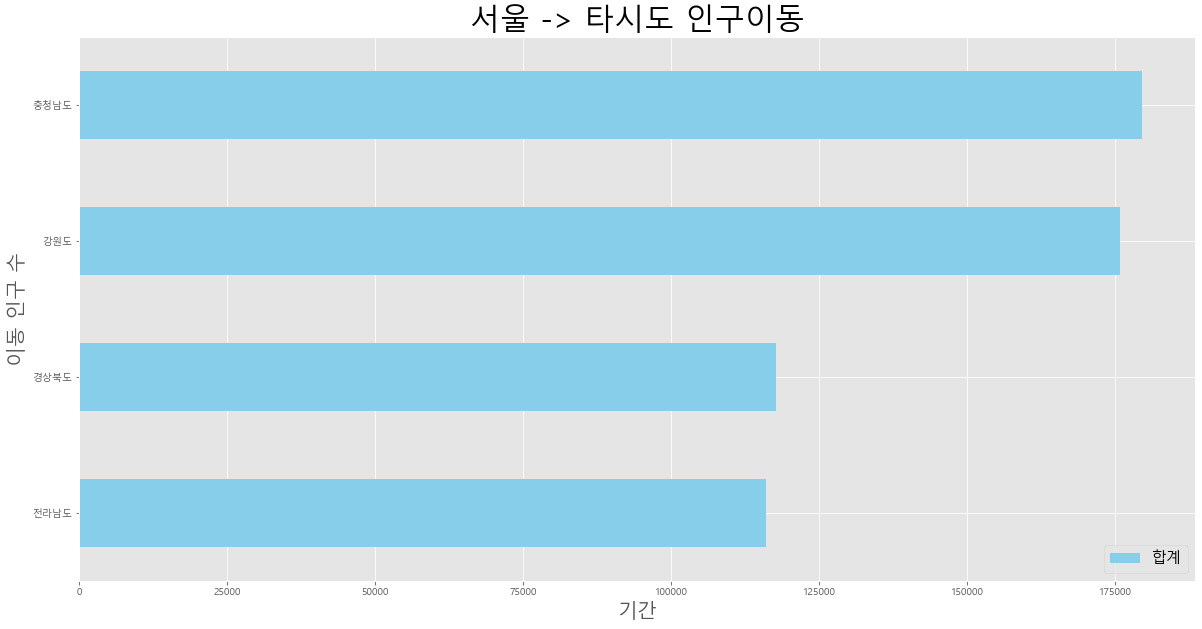

In [14]:
# 수평 막대 그래프
col_years = list(map(str, range(2010,2018)))
df_5 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_5['합계']=df_5.sum(axis=1) # 열 기준(가로방향)으로 값의 합계를 '합계' 컬럼으로 추가
df_total = df_5['합계'].sort_values(ascending=True) # 합계 컬럼의 값을 기준으로 오름차순 정렬한 데이터프레임 생성

plt.style.use('ggplot')

df_total.plot(kind='barh', # 그래프 종류
          figsize=(20,10), # 사이즈
         width=0.5, # 바 너비
         color='skyblue') # 바 색상 

plt.title('서울 -> 타시도 인구이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc=0, fontsize=15)

plt.show()

보졸축 활용

C:\Users\nadai\AppData\Local\Temp/ipykernel_15908/153174534.py:7: FutureWarning: convert_float is deprecated and will be removed in a future version
  df = pd.read_excel('남북한발전전력량.xlsx', convert_float=True) # 숫자형 데이터를 실수형으로 변환해서 불러옴


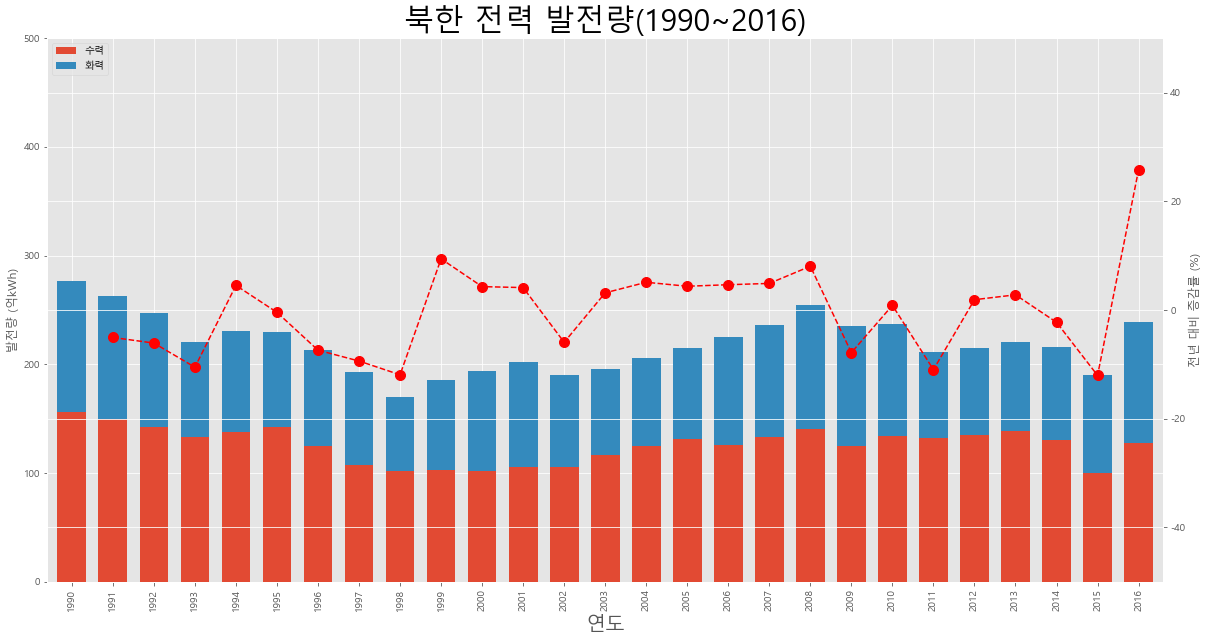

In [16]:
# 한글깨짐방지
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

# 사용 데이터 불러오기
df = pd.read_excel('남북한발전전력량.xlsx', convert_float=True) # 숫자형 데이터를 실수형으로 변환해서 불러옴
df = df.loc[5:9] # 북한 데이터만 추출
df.drop('전력량 (억㎾h)', axis=1, inplace=True) # 전력량 (억kWh) 컬럼 삭제
df.set_index('발전 전력별', inplace=True) # 발전 전력별 컬럼을 인덱스로 지정
df = df.T # 전치

# 총발전량의 1년단위 증감률을 계산해 새로운 컬럼으로 추가
df = df.rename(columns={'합계':'총발전량'}) # 합계를 총발전량으로 컬럼명 변경
df['1년 전 총발전량'] = df['총발전량'].shift(1) # 총발전량을 한 행씩 옮겨 새로운 컬럼 생성
df['증감률'] = ((df['총발전량']/df['1년 전 총발전량'])-1)*100 # 증감률 계산후 새 컬럼 생성

# 그래프 그리기
plt.style.use('ggplot')
plt.rcParams['axes.unicode_minus']=False # 마이너스 부호 출력 설정(안하면 -가 깨져서 나옴)

ax1 = df[['수력','화력']].plot(kind='bar', figsize=(20,10),width=0.7, stacked=True)
ax2 = ax1.twinx() # ax1과 동일한 내용으로 ax2 객체 생성
ax2.plot(df.index, df.증감률, ls='--', marker='o', markersize=10, c='r', label='전년대비 증감률(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size=20)
ax1.set_ylabel('발전량 (억kWh)')
ax2.set_ylabel('전년 대비 증감률 (%)')

plt.title('북한 전력 발전량(1990~2016)', size=30)
ax1.legend(loc='upper left')

plt.show()

히스토그램

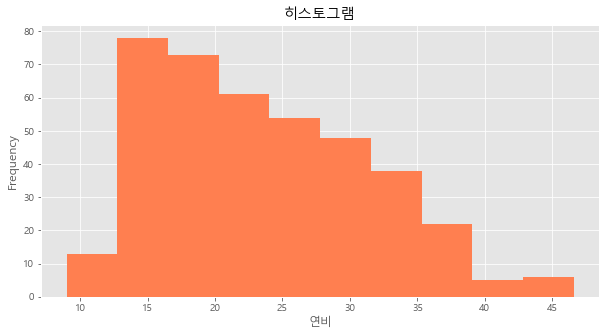

In [18]:
# 한글깨짐방지
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

plt.style.use('ggplot') # 교재의 classic 스타일에서 한글이 안 먹혀서 교체
df['mpg'].plot(kind='hist', bins=10, color='coral', figsize=(10,5)) # bins는 구간 개수를 의미
plt.title('히스토그램')
plt.xlabel('연비')
plt.show()

산점도

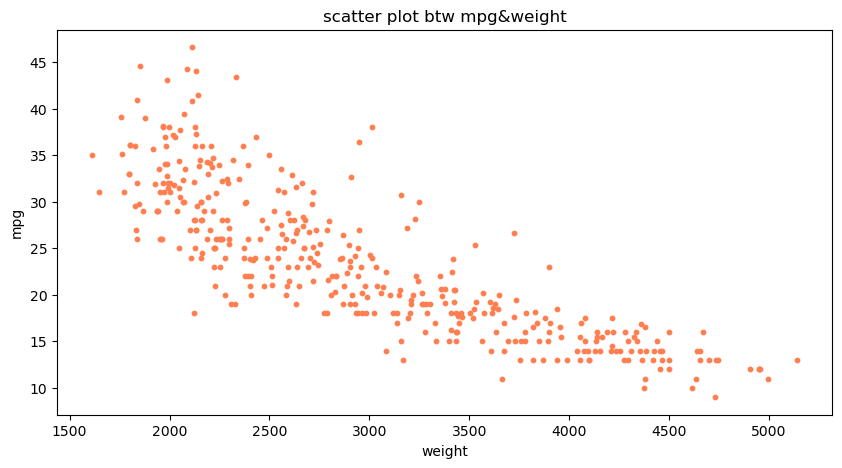

In [19]:
df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

plt.style.use('default')

df.plot(kind='scatter',
       x='weight',
       y='mpg',
       color='coral',
       s=10, # 점 크기
       figsize=(10,5))

plt.title('scatter plot btw mpg&weight')
plt.show()

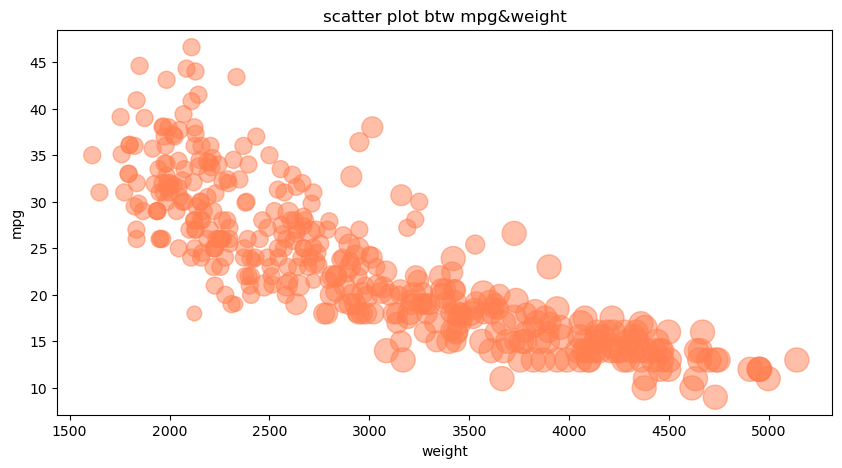

In [20]:
cylinders_size = df.cylinders/df.cylinders.max()*300

plt.style.use('default')

df.plot(kind='scatter', x='weight', y='mpg', color='coral', s=cylinders_size, figsize=(10,5), alpha=0.5) # cylinder_size 값에 따라 사이즈 다르게 출력

plt.title('scatter plot btw mpg&weight')

plt.show()

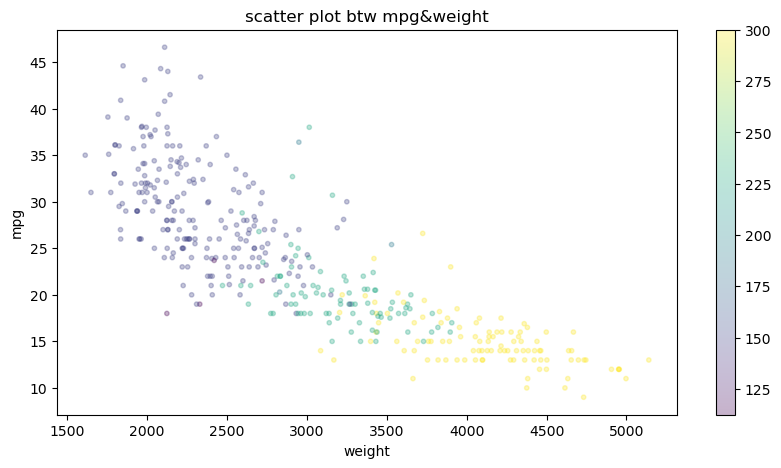

In [21]:
cylinders_size = df.cylinders/df.cylinders.max()*300

plt.style.use('default')

df.plot(kind='scatter', x='weight', y='mpg', c=cylinders_size, s=10, figsize=(10,5), alpha=0.3, cmap='viridis') # 단일 색상 대신 색상맵 이용

plt.title('scatter plot btw mpg&weight')

plt.savefig('./scatterplot.png') # 이미지 파일 저장
plt.savefig('./scatterplot_transparent.png', transparent=True)

plt.show()

파이 차트

        mpg  cylinders  displacement    weight  acceleration  model year  \
USA  5000.8       1556       61229.5  837121.0        3743.4       18827   
EU   1952.4        291        7640.0  169631.0        1175.1        5307   
JPN  2405.6        324        8114.0  175477.0        1277.6        6118   

     count  
USA    249  
EU      70  
JPN     79  


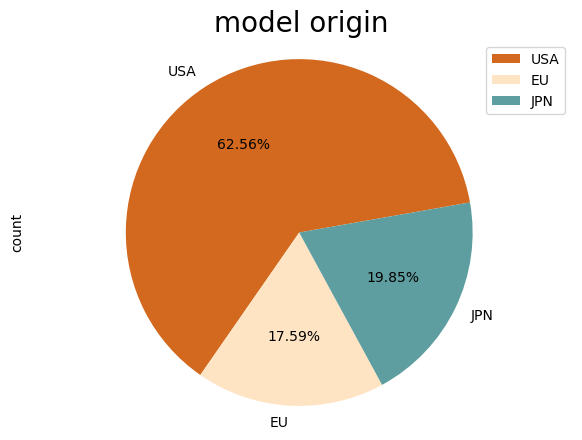

In [22]:
df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['count']=1 # origin 값에 따른 횟수를 세기 위해 1의 값을 가지는 새로운 컬럼 생성
df_origin = df.groupby('origin').sum() # origin 컬럼을 기준으로 그루핑하고 합계 계산
df_origin.index=['USA','EU','JPN'] # 인덱스명 지정
print(df_origin.head())

df_origin['count'].plot(kind='pie',
                       figsize=(7,5),
                       autopct='%.2f%%', # 퍼센트 표시 설정
                       startangle=10, # 시작 각도 설정
                       colors=['chocolate','bisque','cadetblue'])

plt.title('model origin', size=20)
plt.axis('equal') # 축 비율을 동일하게(원형으로 나타나도록)
plt.legend(labels=df_origin.index, loc=0)
plt.show()

boxplot

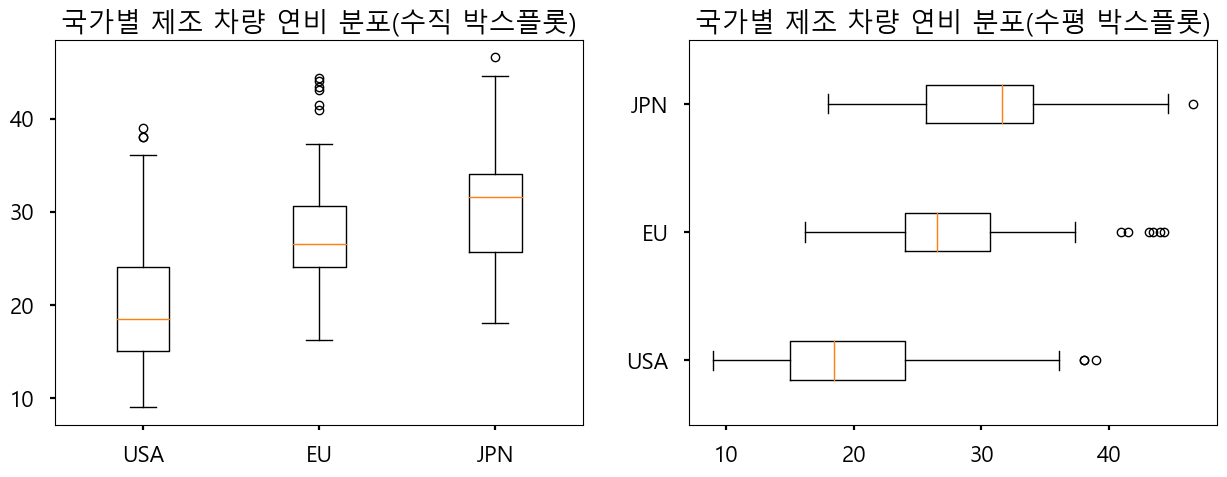

In [24]:
# 한글깨짐방지
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

df = pd.read_csv('auto-mpg.csv', header=None)
df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],df[df['origin']==2]['mpg'],df[df['origin']==3]['mpg']], labels=['USA','EU','JPN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],df[df['origin']==2]['mpg'],df[df['origin']==3]['mpg']], labels=['USA','EU','JPN'], vert=False)

ax1.set_title('국가별 제조 차량 연비 분포(수직 박스플롯)')
ax2.set_title('국가별 제조 차량 연비 분포(수평 박스플롯)')

plt.show()